In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, GlobalMaxPooling2D
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.applications.imagenet_utils import decode_predictions
from livelossplot.keras import PlotLossesCallback
import efficientnet.tfkeras as efn
import datetime
from math import ceil
import math

Using TensorFlow backend.


In [2]:
#Creating Variables and constants

TRAINING_LOG_FILE = "training_log_B4_test.csv"
MODEL_SUMMARY_FILE = "model_summary_B4_test.txt"
MODEL_FILE = "mole_model_B4_test.h5"

PATH = "/Volumes/DATEN_BK/Data/Komplett"

# Data paths
TRAININGS_DIR_PATH = PATH + "/Training"
TEST_DIR_PATH = PATH + "/Test"
VALIDATION_DIR_PATH = PATH + "/Validation"

# Parameters
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 1 #20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [3]:
# Creating Model
lossCallback = EarlyStopping(monitor='loss', patience=1, restore_best_weights=True)

model = Sequential()
efficient_net = efn.EfficientNetB4(weights='imagenet', include_top=False, input_shape=input_shape)
#efficient_net.trainable = False
for index, layer in enumerate(efficient_net.layers):
    if index < 440: #761
        layer.trainable = False

    print(index)
    print(layer)
model.add(efficient_net)
#model.add(GlobalMaxPooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Flatten())
#if dropout_rate > 0:
#    model.add(layers.Dropout(dropout_rate, name="dropout_out"))
#    model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(Dense(1, activation='sigmoid')) #, name="output"
model.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=0.0001),
            metrics=['accuracy', tf.keras.metrics.AUC()])


with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19d906c90>
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19dba0510>
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19dd78710>
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19de51ad0>
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19eb29b50>
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7fc19ec02ed0>
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x

In [4]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

Found 16370 images belonging to 2 classes.
Found 2182 images belonging to 2 classes.
Found 3273 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
 Benign/ISIC_0001791.jpeg the lable: 0


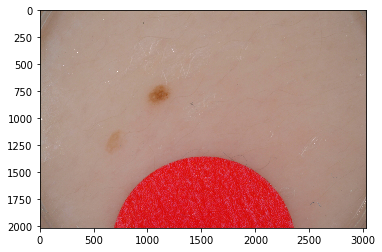

 Benign/ISIC_0000227.jpeg the lable: 0


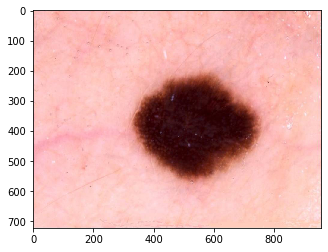

 Benign/ISIC_0000016.jpeg the lable: 0


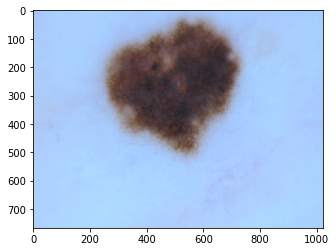

 Benign/ISIC_0027379.jpeg the lable: 0


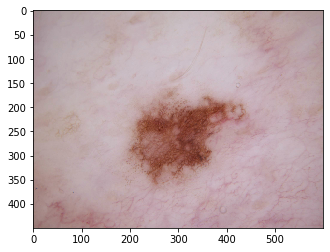

 Malignant/ISIC_0011056.jpeg the lable: 1


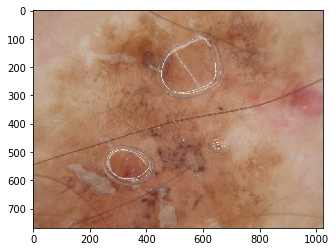

 Malignant/ISIC_0034162.jpeg the lable: 1


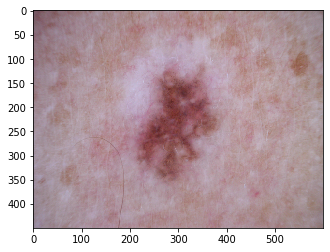

In [5]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    TRAININGS_DIR_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    VALIDATION_DIR_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    TEST_DIR_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

print(training_generator.classes)
index = [1000, 100, 10, 10000, 15000, 16343]
for number in index:
    print(" " + training_generator.filenames[number] + " the lable: " + str(training_generator.labels[number]))
    image_path = TRAININGS_DIR_PATH + "/" + training_generator.filenames[number]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.show()


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/livelossplot/core.py:57: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(1 + skip, max_epoch)
/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/livelossplot/core.py:57: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(1 + skip, max_epoch)
/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/livelossplot/core.py:57: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(1 + skip, max_epoch)


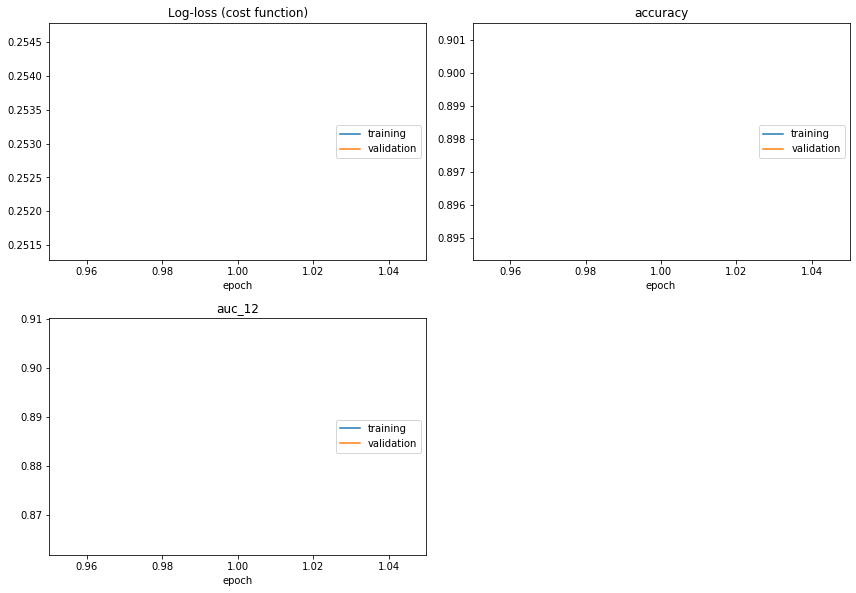

Log-loss (cost function):
training   (min:    0.255, max:    0.255, cur:    0.255)
validation (min:    0.251, max:    0.251, cur:    0.251)

accuracy:
training   (min:    0.895, max:    0.895, cur:    0.895)
validation (min:    0.901, max:    0.901, cur:    0.901)

auc_12:
training   (min:    0.864, max:    0.864, cur:    0.864)
validation (min:    0.908, max:    0.908, cur:    0.908)
511/511 [==============================] - 3146s 6s/step - loss: 0.2546 - accuracy: 0.8947 - auc_12: 0.8640 - val_loss: 0.2514 - val_accuracy: 0.9012 - val_auc_12: 0.9080
Starttime: 2020-07-14 19:25:43.056461 Endtime: 2020-07-14 20:18:19.013173 duration (52, 35)


In [38]:
# Training
TRAINING_START_TIME = datetime.datetime.now()

model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[lossCallback, PlotLossesCallback(), CSVLogger(TRAINING_LOG_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)

model.save_weights("Weights_" + MODEL_FILE)
model.save(MODEL_FILE)

TRAINING_END_TIME = datetime.datetime.now()
DURATION = TRAINING_END_TIME - TRAINING_START_TIME
seconds_in_day = 24 * 60 * 60

print("Starttime: " + str(TRAINING_START_TIME) +" Endtime: " + str(TRAINING_END_TIME) + " duration " + 
      str(divmod(DURATION.days * seconds_in_day + DURATION.seconds, 60)) )



In [6]:
#Loading Model

MODEL_PATH = "/Users/bastiankamp/Results_CNN/mole_model_B4_final.h5"

model = tf.keras.models.load_model(MODEL_PATH)


In [7]:
#Creating Test and execute
probabilities = model.predict(test_generator, batch_size=None,steps=10)
for index, probability in enumerate(probabilities):
    image_path = TEST_DIR_PATH + "/" + test_generator.filenames[index]
    img = mpimg.imread(image_path)
    #plt.imshow(img)
    #print(str(probability[0]) + " " + test_generator.filenames[index] + " the lable: " + str(test_generator.labels[index]))
    y_classes = probabilities.argmax(axis=-1)
    #print(y_classes)
    #if probability[0] < 0.5:
        #plt.title("%.2f" % (100-probability[0]*100) + "% Benign: Should be: " + test_generator.filenames[index])
    #else:
        #plt.title("%.2f" % ((probability[0])*100) + "% Malignant Should be: " + test_generator.filenames[index])
    #plt.show()


TESTING_START_TIME = datetime.datetime.now()

probabilities = model.predict(test_generator, batch_size=None)

TESTING_END_TIME = datetime.datetime.now()
DURATION = TESTING_END_TIME - TESTING_START_TIME
seconds_in_day = 24 * 60 * 60

print("Starttime Testing: " + str(TESTING_START_TIME) +" Endtime Testing: " + str(TESTING_END_TIME) + " duration " + 
      str(divmod(DURATION.days * seconds_in_day + DURATION.seconds, 60)) )


Starttime Testing: 2020-07-23 08:16:29.517816 Endtime Testing: 2020-07-23 08:29:11.363626 duration (12, 41)


/Volumes/DATEN_BK/Data/Komplett/Test
/Volumes/DATEN_BK/Data/Komplett/Training
[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
Total Count: 3273
Used THreshholds: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
Benign als Benign: [352 284 271 258 253 245 239 231 225 217 213 210 204 195 186 177 168 157
 147 129]
Malignant als Benign: [2921  310  250  213  188  162  151  131  122  112  104   96   89   80
   76   71   66   51   39   26]
Benign als Malignant: [  0  68  81  94  99 107 113 121 127 135 139 142 148 157 166 175 184 195
 205 223]
Malignant als Malignant: [   0 2611 2671 2708 2733 2759 2770 2790 2799 2809 2817 2825 2832 2841
 2845 2850 2855 2870 2882 2895]
True Positiv rate: [1.         0.80681818 0.76988636 0.73295455 0.71875    0.69602273
 0.67897727 0.65625    0.63920455 0.61647727 0.60511364 0.59659091
 0.57954545 0.55397727 0.52840909 0.50284091 0.47727273 0.44602273
 0.41761364 0.36647727]
False Negativ rate: [1.         0.106

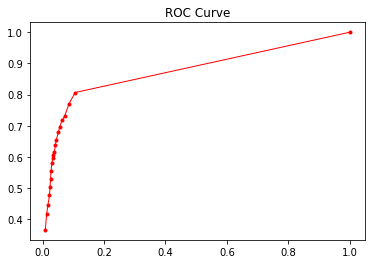

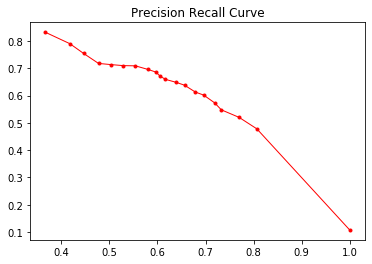

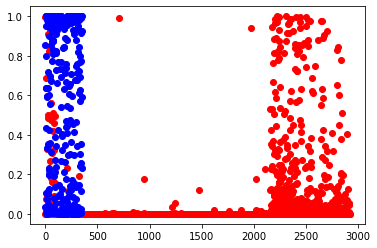

AUC of PR: tf.Tensor(0.6866709, shape=(), dtype=float32)


In [8]:
#Present Test results

print(TEST_DIR_PATH)
print(TRAININGS_DIR_PATH)
print(test_generator)


calculator_index = np.arange(0,100,5)

print(calculator_index)

# tp = malignant as malignant identified
tp = np.zeros(len(calculator_index), dtype = int)
# fp = benign as malignant identified
fp = np.zeros(len(calculator_index), dtype = int)
# fn = malignant as benign identified
fn = np.zeros(len(calculator_index), dtype = int)
# tn = benign as benign identified
tn = np.zeros(len(calculator_index), dtype = int)
counter = 0

probablities_pure = []

for index, probability in enumerate(probabilities):
    tmpIndexCount = 0
    for th in calculator_index:
        if probability[0] < th/100:
            if "Benign" in test_generator.filenames[index]:
                 tn[tmpIndexCount] +=1
            else:
                fn[tmpIndexCount] += 1
        else:
            if "Malignant" in test_generator.filenames[index]:
                 tp[tmpIndexCount] +=1
            else:
                fp[tmpIndexCount] += 1
        tmpIndexCount += 1
    probablities_pure.append(probability[0])
    counter += 1


#True Positiv Rate or Sensitivity:
tpr=np.zeros(len(calculator_index), dtype = float)
fpr=np.zeros(len(calculator_index), dtype = float)

for index in range(len(tp)):
    tmpTPR = tp[index]/(tp[index]+fn[index])
    tmpFPR = (1-(tn[index]/(tn[index]+fp[index])))
        
    if math.isnan(tmpTPR):
        tpr[index] = 0
    else:
        tpr[index] = tmpTPR

    if math.isnan(tmpFPR):
        fpr[index] = 0
    else:
        fpr[index] = tmpFPR
        
#Precision Recall Cureve:
p=np.zeros(len(calculator_index), dtype = float)
r=np.zeros(len(calculator_index), dtype = float)

for index in range(len(tp)):
    tmpP = tp[index]/(tp[index]+fp[index])
    tmpR = tpr[index]
        
    if math.isnan(tmpP):
        p[index] = 0
    else:
        p[index] = tmpP

    if math.isnan(tmpR):
        r[index] = 0
    else:
        r[index] = tmpR
        
print("Total Count: "+ str(counter))   
print("Used THreshholds: "+ str(calculator_index/10)) 
print("Malignant als Malignant: "+ str(tp)) 
print("Benign als Malignant: "+ str(fp)) 
print("Malignant als Benign: "+ str(fn)) 
print("Benign als Benign: "+ str(tn)) 
print("True Positiv rate: "+ str(tpr)) 
print("False Negativ rate: "+ str(fpr)) 
    
plt.plot( fpr,tpr, color='red', linewidth=1,marker=".", label ="True Positiv Rate, False Positiv Rate")
plt.title("ROC Curve")
plt.show()

plt.plot( r,p, color='red', linewidth=1,marker=".", label ="True Positiv Rate, False Positiv Rate")
plt.title("Precision Recall Curve")
plt.show()

#Graph with all Decisions

benign =[]
malignant = []


for index, probability in enumerate(probabilities):
    tmpIndexCount = 0
    if "Benign" in test_generator.filenames[index]:
         benign.append(probability)
    else:
        malignant.append(probability)
    
    
plt.plot(benign, "ro")
plt.plot(malignant, "bo")
plt.plot(0.1)
plt.show()


auc = tf.keras.metrics.AUC(
    num_thresholds=200, curve='PR', summation_method='interpolation', name=None,
    dtype=None, thresholds=None, multi_label=False, label_weights=None
)

#print(str(probablities_pure))
auc.update_state(test_generator.labels, probablities_pure)

print("AUC of PR: " + str(auc.result()))

Found 7 images belonging to 2 classes.
0.9981415 Benign/Example-pictures-of-melanoma-2.jpg the lable: 0


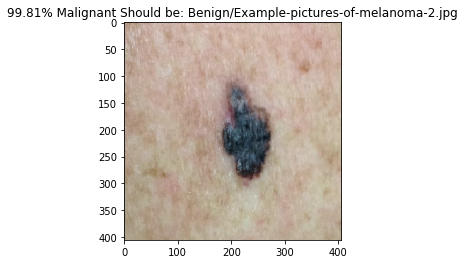

0.7681635 Benign/Example-pictures-of-melanoma.jpg the lable: 0


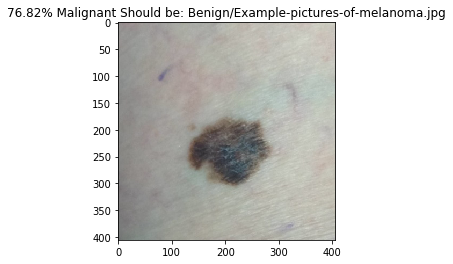

0.00013964433 Benign/IMG_3169.jpg the lable: 0


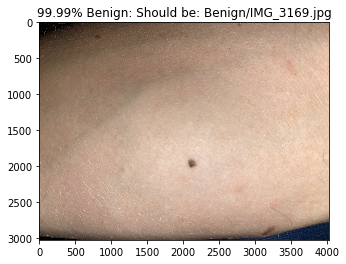

0.975568 Benign/Melanoma.jpg the lable: 0


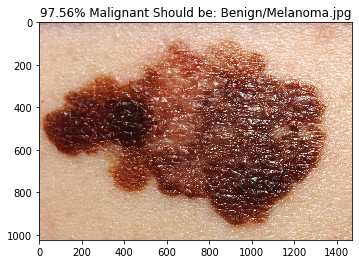

0.0014379498 Benign/im1.png the lable: 0


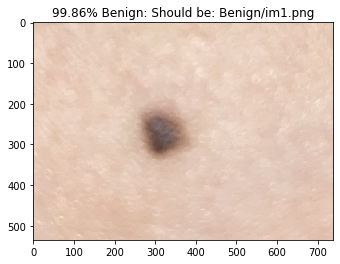

0.11741703 Benign/im2.png the lable: 0


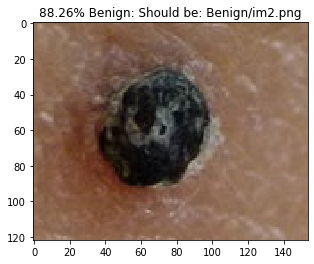

0.73078734 Benign/img_3172.jpg the lable: 0


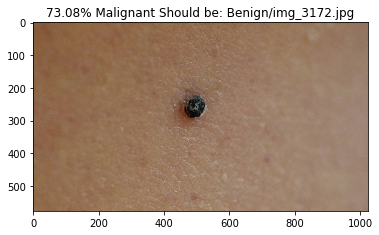

In [7]:
#plt.plot( range(0,len(probabilities)),probabilities, color='red', linewidth=2)
#plt.plot( range(0,len(probabilities)),test_generator.labels,  color='green', linewidth=4)
#plt.show()


 
tim = ImageDataGenerator(rescale=1./255)
    
TIM_MOLE_PATH = "/Users/bastiankamp/Desktop/Tim_Moles"    
    
tim_generator = tim.flow_from_directory(
    TIM_MOLE_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

probabilities = model.predict(tim_generator, batch_size=None)
for index, probability in enumerate(probabilities):
    image_path = TIM_MOLE_PATH + "/" + tim_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    print(str(probability[0]) + " " + tim_generator.filenames[index] + " the lable: " + str(tim_generator.labels[index]))
    y_classes = probabilities.argmax(axis=-1)
    #print(y_classes)
    if probability[0] < 0.5:
        plt.title("%.2f" % (100-probability[0]*100) + "% Benign: Should be: " + tim_generator.filenames[index])
    else:
        plt.title("%.2f" % ((probability[0])*100) + "% Malignant Should be: " + tim_generator.filenames[index])
    plt.show()

